In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

# 데이터 확인

In [3]:
df = pd.read_csv("./data/seoul.csv", skiprows = 6)
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [4]:
df.shape

(42095, 5)

In [5]:
df.info

<bound method DataFrame.info of                  날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0      \t1907-10-01  108     13.5      7.9     20.7
1      \t1907-10-02  108     16.2      7.9     22.0
2      \t1907-10-03  108     16.2     13.1     21.3
3      \t1907-10-04  108     16.5     11.2     22.0
4      \t1907-10-05  108     17.6     10.9     25.4
...             ...  ...      ...      ...      ...
42090  \t2024-03-01  108     -4.1     -7.1      0.3
42091  \t2024-03-02  108     -0.5     -8.1      4.1
42092  \t2024-03-03  108      4.0      0.4      7.8
42093  \t2024-03-04  108      5.4     -1.8     11.7
42094  \t2024-03-05  108      8.0      5.5     11.0

[42095 rows x 5 columns]>

In [6]:
df.dtypes

날짜          object
지점           int64
평균기온(℃)    float64
최저기온(℃)    float64
최고기온(℃)    float64
dtype: object

In [7]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,42095.0,41339.000000,41336.000000,41336.000000
mean,108.0,11.777776,7.490495,16.777593
std,0.0,10.661494,10.889021,10.975401
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [8]:
# 날짜 이상데이터 제거
df["날짜"] = df["날짜"].str.strip()             # .str.strip() : \t 제거

In [9]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [10]:
# 결측치 확인
df.isna().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

In [11]:
df[df["최저기온(℃)"].isna()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


In [12]:
df[df["최고기온(℃)"].isna()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


- 1950년대 6.25 전쟁으로 당시 데이터가 수집되지 않은 것으로 처정
    - 1950/06/25 ~ 1953/07/27

In [13]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [14]:
df.columns = ["날짜", "지점", "평균기온", "최저기온", "최고기온"]

In [15]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


# 데이터 분석

## 서울이 가장 더웠던 날

- 서울의 최고기온이 가장 높았던 날 

In [16]:
df["최고기온"].max()

39.6

In [18]:
df["최고기온"].idxmax()      # 최고기온이 39.6도 인 날의 개수

40051

In [19]:
df.loc[40051]

날짜      2018-08-01
지점             108
평균기온          33.6
최저기온          27.8
최고기온          39.6
Name: 40051, dtype: object

In [20]:
df.sort_values(by = "최고기온", ascending = False)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
31276,1994-07-23,108,32.6,28.0,38.2
13111,1943-08-24,108,29.0,23.2,38.2
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


## 내 생일의 기온 변화

In [21]:
# 생일 데이터 추출 ver1
df[df["날짜"].str.endswith("06-26")]

,날짜,지점,평균기온,최저기온,최고기온
269,1908-06-26,108,22.9,18.5,29.4
634,1909-06-26,108,22.4,18.8,28.0
999,1910-06-26,108,19.3,16.9,23.7
1364,1911-06-26,108,20.4,18.0,25.1
1730,1912-06-26,108,24.2,20.1,29.5
...,...,...,...,...,...
40380,2019-06-26,108,25.5,20.7,29.5
40746,2020-06-26,108,21.8,19.2,25.7
41111,2021-06-26,108,22.8,19.9,26.7
41476,2022-06-26,108,26.5,24.8,28.1


In [22]:
# 생일 데이터 추출 ver2
ndf = df.copy()

In [24]:
ndf["date"] = pd.to_datetime(df["날짜"])

In [25]:
ndf.head()

,날짜,지점,평균기온,최저기온,최고기온,date
0,1907-10-01,108,13.5,7.9,20.7,1907-10-01
1,1907-10-02,108,16.2,7.9,22.0,1907-10-02
2,1907-10-03,108,16.2,13.1,21.3,1907-10-03
3,1907-10-04,108,16.5,11.2,22.0,1907-10-04
4,1907-10-05,108,17.6,10.9,25.4,1907-10-05


In [30]:
birthday_df = ndf[(ndf["date"].dt.month == 6) & (ndf["date"].dt.day == 26)]   # dt.month : 월 정보만 빼줌 , dt.day : 일 정보만 빼줌

In [31]:
birthday_df.head()

,날짜,지점,평균기온,최저기온,최고기온,date
269,1908-06-26,108,22.9,18.5,29.4,1908-06-26
634,1909-06-26,108,22.4,18.8,28.0,1909-06-26
999,1910-06-26,108,19.3,16.9,23.7,1910-06-26
1364,1911-06-26,108,20.4,18.0,25.1,1911-06-26
1730,1912-06-26,108,24.2,20.1,29.5,1912-06-26


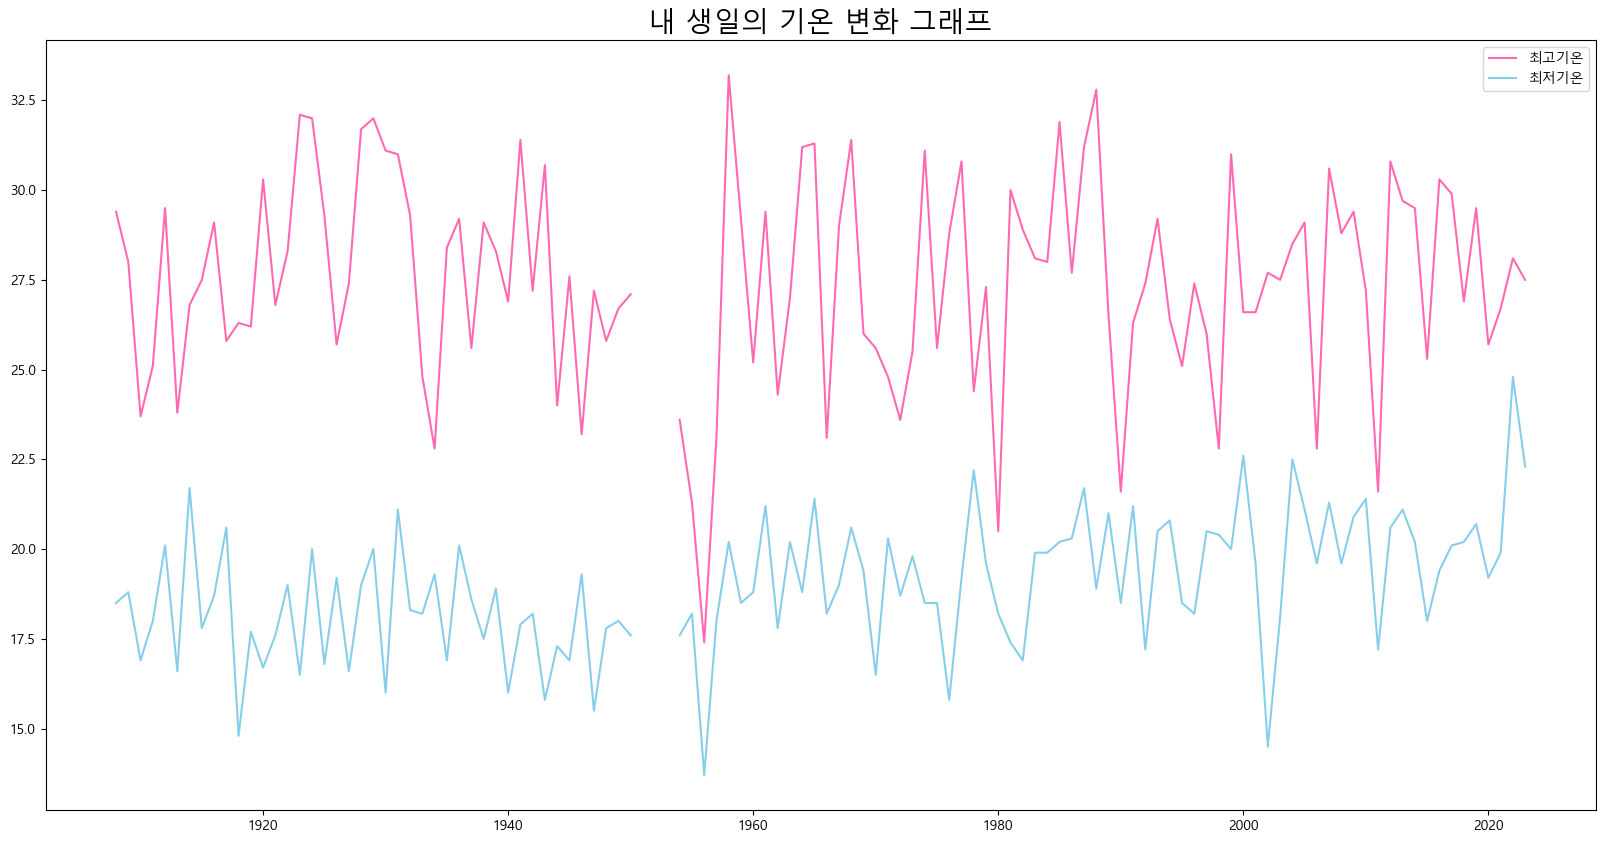

In [35]:
# 시각화
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(birthday_df["date"].dt.year, birthday_df["최고기온"], "hotpink", label = "최고기온")
ax.plot(birthday_df["date"].dt.year, birthday_df["최저기온"], "skyblue", label = "최저기온")
ax.legend()
ax.set_title("내 생일의 기온 변화 그래프", size = 20)

plt.show()

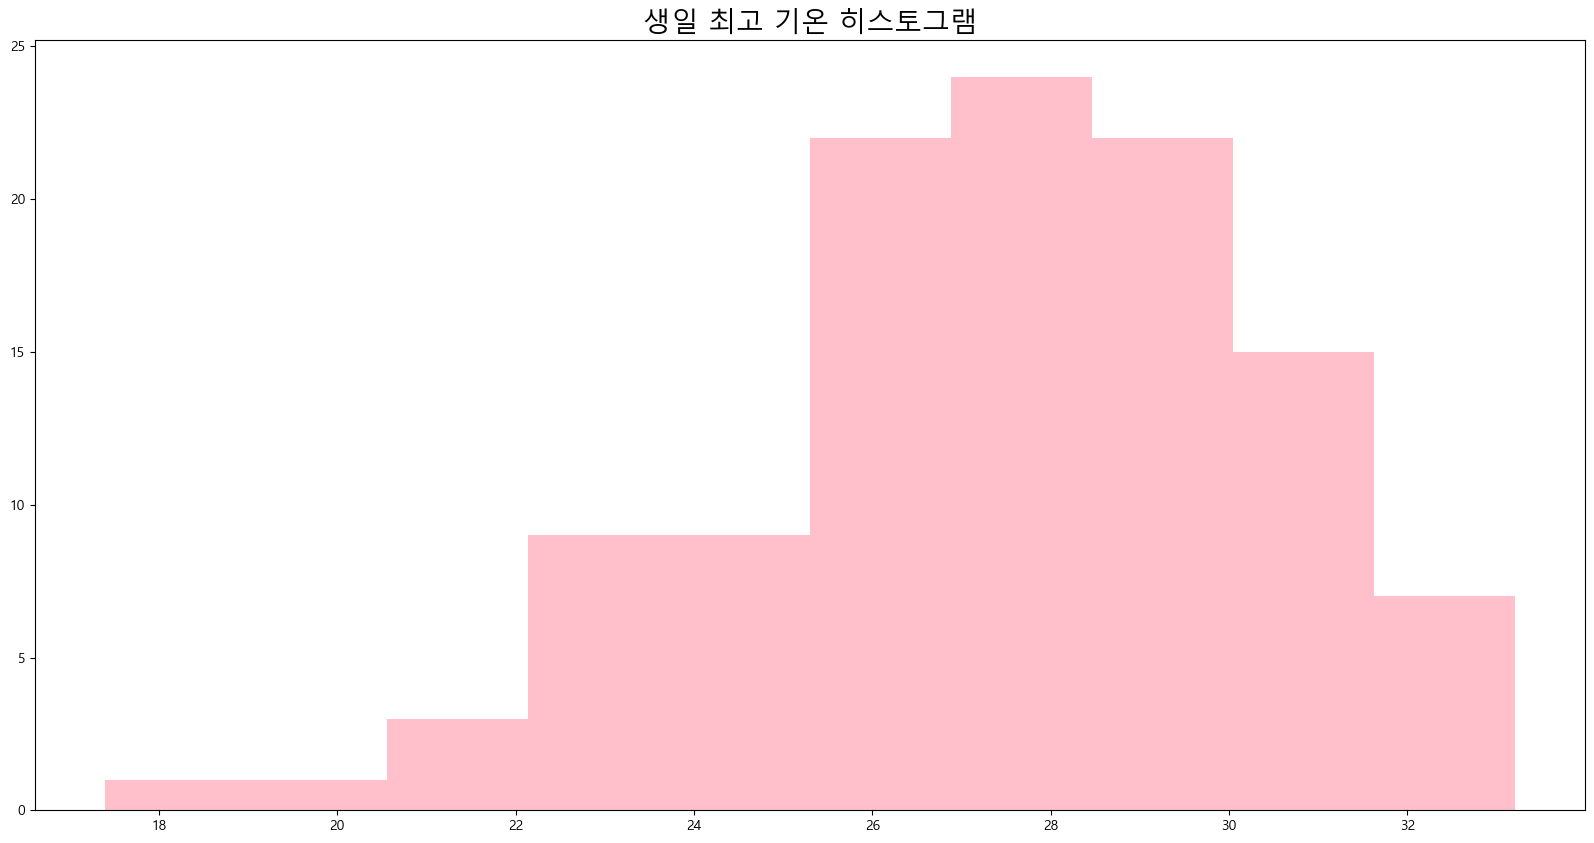

In [38]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.hist(birthday_df["최고기온"], color = "pink")
ax.set_title("생일 최고 기온 히스토그램", size = 20)
plt.show()

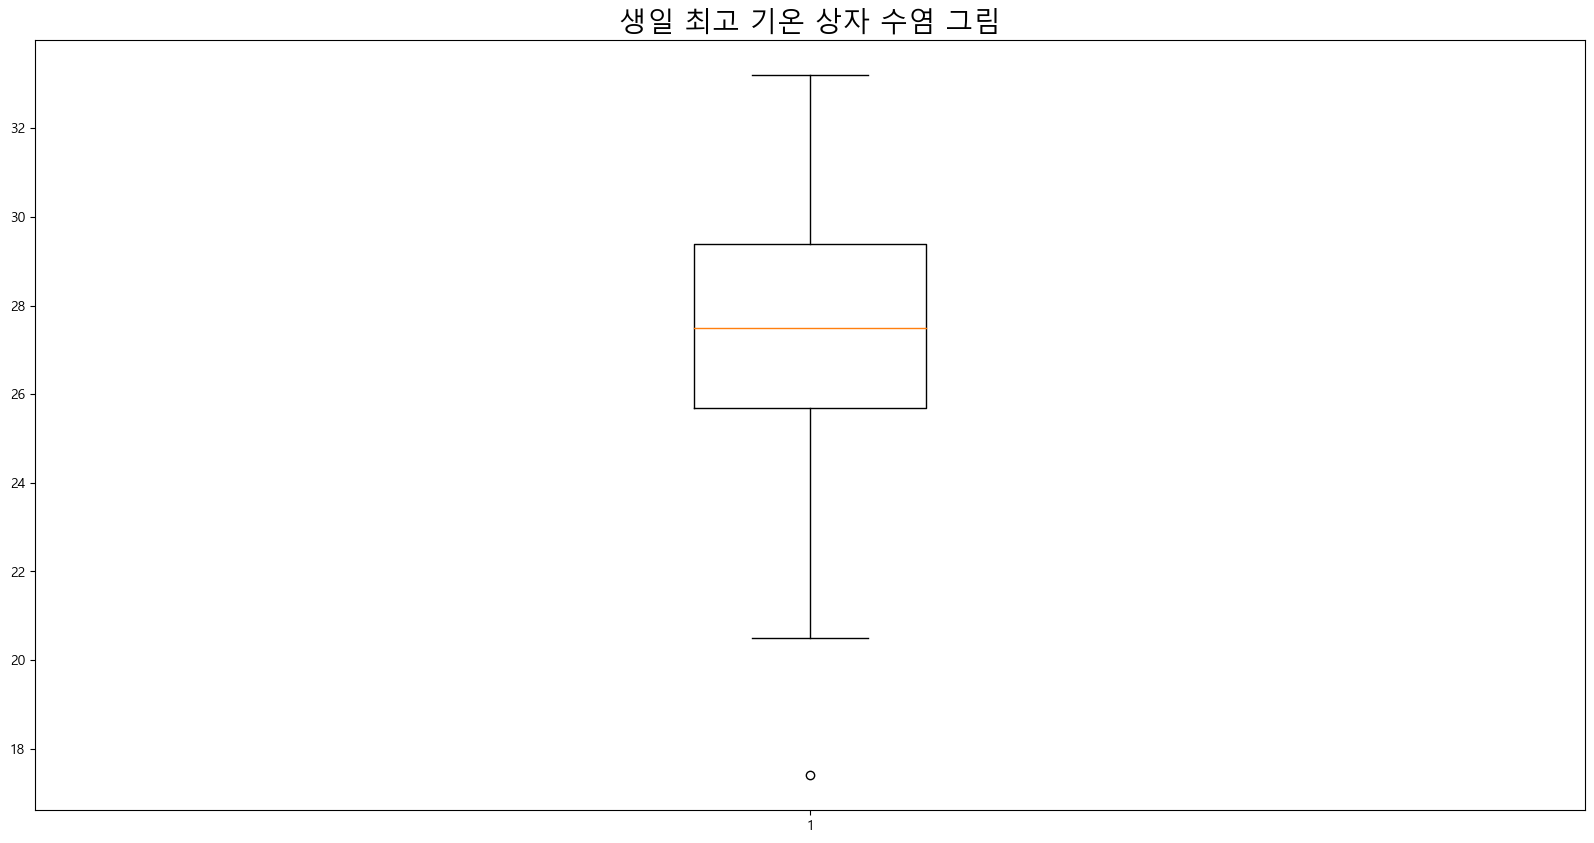

In [39]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.boxplot(birthday_df["최고기온"].dropna())
ax.set_title("생일 최고 기온 상자 수염 그림", size = 20)
plt.show()

In [40]:
iqr = np.subtract(*np.percentile(birthday_df["최고기온"].dropna(), [75, 25]))
iqr

3.6999999999999993

In [44]:
q3, q1 = np.percentile(birthday_df["최고기온"].dropna(), [75, 25])
q3, q1

(29.4, 25.7)

In [45]:
outlier = q1 - (1.5 * iqr)
outlier

20.15

In [46]:
birthday_df[birthday_df["최고기온"] < outlier]

,날짜,지점,평균기온,최저기온,최고기온,date
17370,1956-06-26,108,14.9,13.7,17.4,1956-06-26
